<a href="https://colab.research.google.com/github/giauhuynh2002/HuynhPhatGiau-20104026/blob/main/nhan_dien_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Khai báo các thư viện cần sử dụng
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Kết nối với google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/BT AI/Hoa/train', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 88 images belonging to 3 classes.


In [ ]:
# Tạo bộ dữ liệu test
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/BT AI/Hoa/test', target_size=(224,224), batch_size=32, class_mode='categorical')


Found 15 images belonging to 3 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training
training_set.class_indices

{'rose': 0, 'sen': 1, 'tulip': 2}

In [ ]:
# Các nhãn có trong bộ dữ liệu test
test_set.class_indices

{'rose': 0, 'sen': 1, 'tulip': 2}

In [ ]:
x_train = np.concatenate([training_set.next()[0] for i in range(training_set.__len__())])
y_train = np.concatenate([training_set.next()[1] for i in range(training_set.__len__())])
print(x_train.shape)
print(y_train.shape)

(88, 224, 224, 3)
(88, 3)


In [ ]:
x_test = np.concatenate([test_set.next()[0] for i in range(test_set.__len__())])
y_test = np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])
print(x_test.shape)
print(y_test.shape)

(15, 224, 224, 3)
(15, 3)


In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(2048, activation = "relu", input_shape = (224*224*3,)))
model.add(layers.Dense(2048, activation= "relu"))
model.add(layers.Dense(3, activation= "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              308283392 
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_2 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 312,485,891
Trainable params: 312,485,891
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = x_train.reshape((88,224*224*3))
x_test = x_test.reshape((15,224*224*3))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
'''from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,3)
y_test = np_utils.to_categorical(y_test,3)'''

'from keras.utils import np_utils\ny_train = np_utils.to_categorical(y_train,3)\ny_test = np_utils.to_categorical(y_test,3)'

In [ ]:
x_train.shape


(88, 150528)

In [ ]:
y_train.shape

(88, 3)

In [ ]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
3/3 [==============================] - 15s 3s/step - loss: 7.4603 - accuracy: 0.2841
Epoch 2/100
3/3 [==============================] - 9s 3s/step - loss: 5.9771 - accuracy: 0.2727
Epoch 3/100
3/3 [==============================] - 10s 3s/step - loss: 1.2399 - accuracy: 0.3295
Epoch 4/100
3/3 [==============================] - 11s 3s/step - loss: 1.0847 - accuracy: 0.3864
Epoch 5/100
3/3 [==============================] - 9s 3s/step - loss: 1.2204 - accuracy: 0.4318
Epoch 6/100
3/3 [==============================] - 9s 3s/step - loss: 1.0765 - accuracy: 0.5455
Epoch 7/100
3/3 [==============================] - 9s 3s/step - loss: 1.0293 - accuracy: 0.4432
Epoch 8/100
3/3 [==============================] - 8s 3s/step - loss: 0.9975 - accuracy: 0.4432
Epoch 9/100
3/3 [==============================] - 13s 4s/step - loss: 1.1512 - accuracy: 0.3523
Epoch 10/100
3/3 [==============================] - 9s 3s/step - loss: 1.0536 - accuracy: 0.5000
Epoch 11/100
3/3 [=================

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(x_train,y_train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.038072094321250916
Train Accuracy 1.0


In [ ]:
# Lưu lại
model.save("Nhan_dien_hoa.h5")

In [ ]:
# Tải mô hình 
model_ANN=load_model('Nhan_dien_hoa.h5')

In [ ]:
class_names = ["rose", "sen", "tulip"]

1/1 [==============================] - 0s 154ms/step
[[0. 1. 0.]]
Kết quả:  sen
Độ chính xác:  1.0


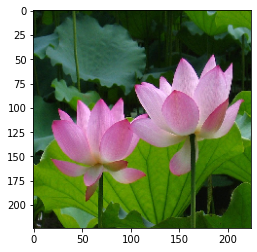

In [ ]:
from tensorflow.keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

url = "/content/drive/MyDrive/BT AI/Hoa/test/sen/sen (21).jpg"
img = load_img(url, target_size=(224,224,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 224, 224, 3)
img = img.astype("float32")
img = img/255
img = img.reshape(-1, 224*224*3)

prediction = model.predict(img)
np.argmax(prediction, axis=1)
index = -1
max_value = -1

for i in range(0, len(prediction[0])):
  if max_value < prediction[0][i]:
    max_value = prediction[0][i]
    index = i
print(prediction)
print("Kết quả: ", class_names[index])
print("Độ chính xác: ", max_value)